In [75]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [76]:
orders = pd.read_csv("data/Orders.csv")

In [77]:
returns = pd.read_csv("data/Returns.csv")

In [78]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.00,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.10,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.10,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.10,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.00,$311.52,903.040,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.10,$763.28,897.350,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.00,$564.84,894.770,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.00,$996.48,878.380,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.00,$54.71,25.270,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.20,$5.48,11.130,High


In [79]:
returns.columns = ['Returned', 'Order.ID', 'Region']

In [80]:
orders['Sales']= list(map(lambda x: float(x.replace('$','').replace(',','')), orders['Sales']))
orders['Profit'] = list(map(lambda x: float(x.replace('$','').replace(',','')), orders['Profit']))

In [81]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [82]:
orders = orders.sort_values(by=['Order.Date'])

In [83]:
orders['month'] = pd.Series(list(pd.DatetimeIndex(orders['Order.Date']).month))

(array([ 4820.,  3007.,  3032.,  3787.,  5302.,  3195.,  5065.,  5958.,
         4556., 12568.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

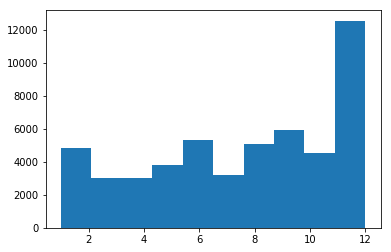

In [84]:
plt.hist(orders['month'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e71d898>,
      dtype=object)

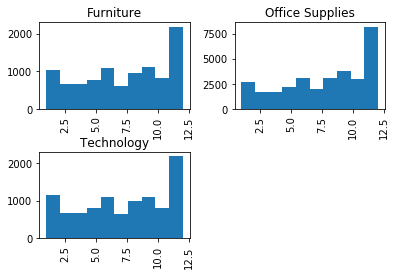

In [85]:
(orders['month']).hist(by=orders.Category)

In [86]:
ordersreturn = pd.merge(orders, returns, on=['Order.ID','Region'], how='outer')

In [89]:
ordersreturn

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,Returned,years
0,22253.0,IN-2012-JH159857-40909,2012-01-01,1/8/12,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,"Acme Trimmer, High Speed",120.37,3.0,0.10,36.04,9.720,Medium,5.0,NaN,2012.0
1,22254.0,IN-2012-JH159857-40909,2012-01-01,1/8/12,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,"Eaton Computer Printout Paper, 8.5 x 11",55.24,2.0,0.10,15.34,1.800,Medium,9.0,NaN,2012.0
2,22255.0,IN-2012-JH159857-40909,2012-01-01,1/8/12,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,"Eldon Light Bulb, Duo Pack",113.67,5.0,0.10,37.77,4.700,Medium,11.0,NaN,2012.0
3,48883.0,HU-2012-AT73557-40909,2012-01-01,1/5/12,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,...,"Tenex Box, Single Width",66.12,4.0,0.00,29.64,8.170,High,6.0,NaN,2012.0
4,11731.0,IT-2012-EM14140124-40909,2012-01-01,1/5/12,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,...,"Enermax Note Cards, Premium",44.87,3.0,0.50,-26.06,4.820,High,11.0,NaN,2012.0
5,42433.0,AG-2012-TB112803-40909,2012-01-01,1/6/12,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,...,"Tenex Lockers, Blue",408.30,2.0,0.00,106.14,35.460,Medium,1.0,NaN,2012.0
6,49550.0,CA-2012-MM726023-40910,2012-01-02,1/6/12,Standard Class,MM-726023,Magdelene Morse,Consumer,NaN,St. Catharines,...,"Okidata Inkjet, Wireless",314.22,1.0,0.00,3.12,24.100,Medium,4.0,NaN,2012.0
7,30453.0,ID-2012-KL1664592-40911,2012-01-03,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,...,"Belkin Numeric Keypad, Bluetooth",69.30,2.0,0.40,3.42,8.340,Low,6.0,NaN,2012.0
8,30450.0,ID-2012-KL1664592-40911,2012-01-03,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,...,"Hewlett Wireless Fax, Laser",912.46,4.0,0.40,-319.46,107.100,Low,6.0,NaN,2012.0
9,30451.0,ID-2012-KL1664592-40911,2012-01-03,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,...,"Hon Rocking Chair, Set of Two",159.44,2.0,0.40,-95.68,10.070,Low,4.0,NaN,2012.0


In [90]:
ordersreturn['years'] = pd.Series(list(pd.DatetimeIndex(ordersreturn['Order.Date']).year))

In [91]:
ordersreturn.groupby(['Returned','years']).agg('Profit').sum()

Returned  years 
Yes       2012.0    17396.86
          2013.0     9077.77
          2014.0    17180.12
          2015.0    17114.50
Name: Profit, dtype: float64

In [92]:
np.sum(ordersreturn.groupby(['Customer.Name']).agg('Returned').count().sort_values(ascending=False)>1)

445

In [93]:
np.sum(ordersreturn.groupby(['Customer.Name']).agg('Returned').count().sort_values(ascending=False)>5)

123

In [107]:
returnregion = ordersreturn.groupby(['Region']).agg('Returned').count()

In [108]:
orderregion = ordersreturn.groupby(['Region']).agg('Order.ID').count()

In [110]:
(returnregion/orderregion).sort_values(ascending=False)

Region
Western Canada       1.000000
Eastern Canada       1.000000
Western US           0.055261
Eastern Asia         0.055181
Southern Europe      0.053005
Southern Africa      0.052301
Southern US          0.051235
Eastern US           0.047051
Southeastern Asia    0.044743
South America        0.044511
Western Asia         0.044262
Oceania              0.044164
Central America      0.044160
Southern Asia        0.041808
Central Asia         0.041475
Western Africa       0.041096
Caribbean            0.040828
North Africa         0.039906
Western Europe       0.039606
Northern Europe      0.034483
Central US           0.030564
Eastern Europe       0.027469
Central Africa       0.026439
Eastern Africa       0.024725
Canada               0.000000
dtype: float64

In [115]:
ordersreturn.groupby(['Category']).agg('Returned').count().sort_values(ascending=False)

Category
Office Supplies    1334
Technology          442
Furniture           426
Name: Returned, dtype: int64

In [ ]:
ordersreturn.groupby(['Sub.Category']).agg('Order.ID').count()

In [59]:
ordersreturn.groupby(['Category']).agg('Returned').count().sort_values(ascending=False)

Category
Office Supplies    1348
Technology          445
Furniture           427
Name: Returned, dtype: int64

In [133]:
orders.groupby(by=pd.DatetimeIndex(orders['Order.Date']).month)

In [71]:
monthDummies = pd.get_dummies(pd.DatetimeIndex(orders['Order.Date']).month)

In [74]:
monthDummies.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [118]:
pd.DatetimeIndex(orders['Order.Date']).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2012, 2013, 2014, 2012,
            ...
            2014, 2015, 2015, 2015, 2013, 2015, 2014, 2012, 2013, 2013],
           dtype='int64', name='Order.Date', length=51290)

In [119]:
orders['years'] = pd.Series(list(pd.DatetimeIndex(orders['Order.Date']).year))

In [73]:
monthDummies.drop([1], axis = 1, inplace=True)

In [78]:
orders = pd.concat([orders, monthDummies], axis=1)

In [86]:
season = LinearRegression()

In [127]:
orders = orders.drop(columns=['months'])

In [120]:
X = orders[['years',2,3,4,5,6,7,8,9,10,11,12]]
X

,years,2,3,4,5,6,7,8,9,10,11,12
0,2014,0,0,0,0,0,0,0,0,0,1,0
1,2014,1,0,0,0,0,0,0,0,0,0,0
2,2014,0,0,0,0,0,0,0,0,1,0,0
3,2014,0,0,0,0,0,0,0,0,0,0,0
4,2014,0,0,0,0,0,0,0,0,0,1,0
5,2014,0,0,0,0,1,0,0,0,0,0,0
6,2012,0,0,0,0,0,0,0,0,0,1,0
7,2013,0,0,1,0,0,0,0,0,0,0,0
8,2014,0,0,0,0,0,0,0,0,0,1,0
9,2012,0,1,0,0,0,0,0,0,0,0,0


In [128]:
season.fit(X,orders.years)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
season.intercept_

-5.184119800105691e-11